# Worksheet 12

Name:  Zhupei Xu
UID: U83632486

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1.yes
2.no
3.yes
4.no

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

data splitting -> model training -> Evaluation -> Metrics

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

underfitting: is when model is too simple to represent the pattern. Sign: error is high.
overfitting: when model is too complex, starting to "memorize" data instead of generalizing it.Sign: perform well on training set but bad on the test set.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

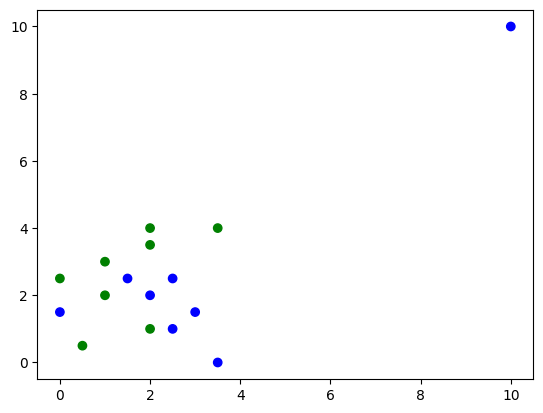

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [4]:
# Convert the data to numpy arrays for easier calculations
attribute_A = np.array(data["Attribute A"])
attribute_B = np.array(data["Attribute B"])

# Calculate the IQR for Attribute A
Q1_A = np.percentile(attribute_A, 25)
Q3_A = np.percentile(attribute_A, 75)
IQR_A = Q3_A - Q1_A
lower_bound_A = Q1_A - 1.5*IQR_A
upper_bound_A = Q3_A + 1.5*IQR_A

# Calculate the IQR for Attribute B
Q1_B = np.percentile(attribute_B, 25)
Q3_B = np.percentile(attribute_B, 75)
IQR_B = Q3_B - Q1_B
lower_bound_B = Q1_B - 1.5*IQR_B
upper_bound_B = Q3_B + 1.5*IQR_B

# Identify the indices of outliers for both attributes
outliers_A = np.where((attribute_A < lower_bound_A) | (attribute_A > upper_bound_A))
outliers_B = np.where((attribute_B < lower_bound_B) | (attribute_B > upper_bound_B))

# Combine the indices of outliers for both attributes
all_outliers = np.union1d(outliers_A, outliers_B)

# Remove outliers from the dataset
data["Attribute A"] = [val for i, val in enumerate(data["Attribute A"]) if i not in all_outliers]
data["Attribute B"] = [val for i, val in enumerate(data["Attribute B"]) if i not in all_outliers]
data["Class"] = [val for i, val in enumerate(data["Class"]) if i not in all_outliers]


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

the data does not have a clear visual pattern so it is hard to identify a point as noise point.


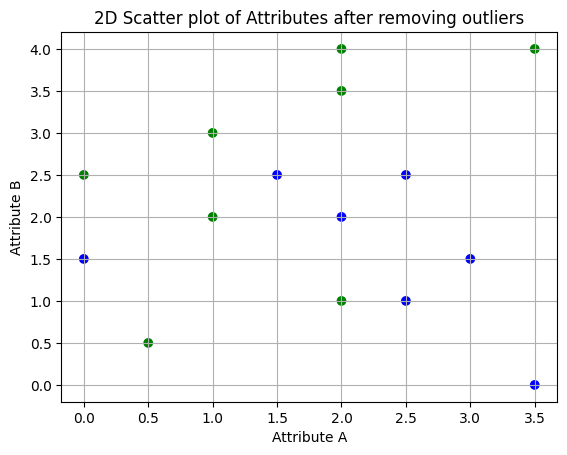

In [5]:
colors = np.array(['b', 'g'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter plot of Attributes after removing outliers")
plt.grid(True)
plt.show()


For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

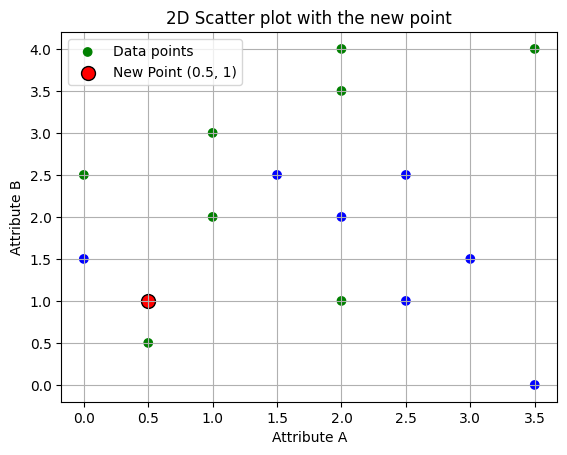

In [6]:
colors = np.array(['b', 'g'])

# Plot the original data points
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist(), label="Data points")
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter plot with the new point")

# Plot the new point in red
plt.scatter(0.5, 1, color='r', label="New Point (0.5, 1)", s=100, edgecolors='k')  # s is for size, edgecolors adds a border to make it more visible

plt.grid(True)
plt.legend()
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

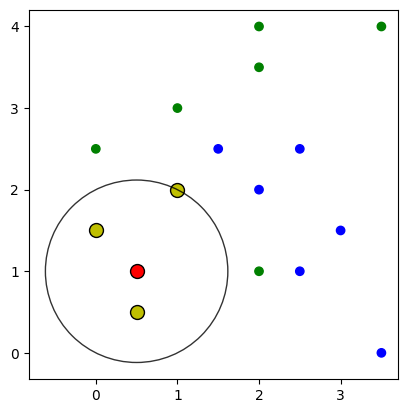

In [8]:
def euclidean_distance(p1, p2):
    """Compute the Euclidean distance between two points."""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def n_closest_to(example, n):
    """Find the n closest points to the given example in the dataset."""
    distances = []
    for a, b in zip(data["Attribute A"], data["Attribute B"]):
        distances.append((a, b, euclidean_distance(example, (a, b))))
    
    # Sort based on the distance (which is the third item in our tuples)
    distances.sort(key=lambda x: x[2])
    
    # Return the n closest points
    return distances[:n]

example = (0.5, 1)
location = ( .5 , 1 )
closest_points = n_closest_to(example, 3)
radius = closest_points[-1][2]
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter(example[0], example[1], color='r', s=100, edgecolors='k')  # The reference point
for point in closest_points:
    axes.scatter(point[0], point[1], color='y', s=100, edgecolors='k')  
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [9]:
def majority(points):
    """Return the class that the majority of points have."""
    class_counts = {0: 0, 1: 0}  # Initialize class count dictionary
    
    # Extract the class labels of the points and count them
    for point in points:
        a, b, _ = point
        index = data["Attribute A"].index(a)  # Assuming unique attribute values for simplicity
        class_label = data["Class"][index]
        class_counts[class_label] += 1
        
    # Determine and return the majority class
    if class_counts[0] > class_counts[1]:
        return 0
    elif class_counts[1] > class_counts[0]:
        return 1
    else:
        return 0  # default class in case of a tie

# Find the majority class for the three closest points
assigned_class = majority(closest_points)
print(f"The assigned class for the point (0.5, 1) is: {assigned_class}")


The assigned class for the point (0.5, 1) is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [10]:
def n_closest_to_exclude(example, n, exclude_index):
    distances = []
    for idx, (a, b) in enumerate(zip(data["Attribute A"], data["Attribute B"])):
        if idx != exclude_index:  # Exclude the test point from the training set
            distances.append((a, b, euclidean_distance(example, (a, b))))
    
    distances.sort(key=lambda x: x[2])
    return distances[:n]
count = 0
total_points = len(data["Attribute A"])

for i in range(total_points):
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]
    
    closest_points = n_closest_to_exclude(test_point, 3, i)
    
    prediction = majority(closest_points)
    
    if prediction == actual_class:
        count += 1

accuracy = count / total_points
print(f"Overall accuracy = {accuracy:.2f}")


Overall accuracy = 0.60
